In [120]:
var("x,y")

(x, y)

In [121]:
eq1=x*(-x*y -5*x/4 -4*y^2 +5*y/4 +5/4)
show(eq1)

-1/4*(4*x*y + 16*y^2 + 5*x - 5*y - 5)*x

In [122]:
eq2=y*(33*x^2/5 +7*x*y/5 -19*x/8 -y^2 +19*y/8 -7/4)
show(eq2)

1/40*(264*x^2 + 56*x*y - 40*y^2 - 95*x + 95*y - 70)*y

In [123]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == 1, y == 0], [x == 0, y == -1/16*I*sqrt(87) + 19/16], [x == 0, y == 1/16*I*sqrt(87) + 19/16], [x == -1/16*sqrt(65) + 5/16, y == 1/16*sqrt(65) + 5/16], [x == 1/16*sqrt(65) + 5/16, y == -1/16*sqrt(65) + 5/16], [x == (1/2), y == (1/2)], [x == (-1/2), y == (-1/2)]]

Ens quedem només amb els punts amb sentit fisic del primer quadrant que són el punt 1,2 i 7

In [124]:
px1=sol[0][0].rhs();
py1=sol[0][1].rhs();
px2=sol[1][0].rhs();
py2=sol[1][1].rhs();
px7=sol[6][0].rhs();
py7=sol[6][1].rhs();
qx=min(px1,px2,px7);qx
qy=min(py1,py2,py7);qy
show(qx)
show(qy)

0

0

Dibuix del camp vectorial

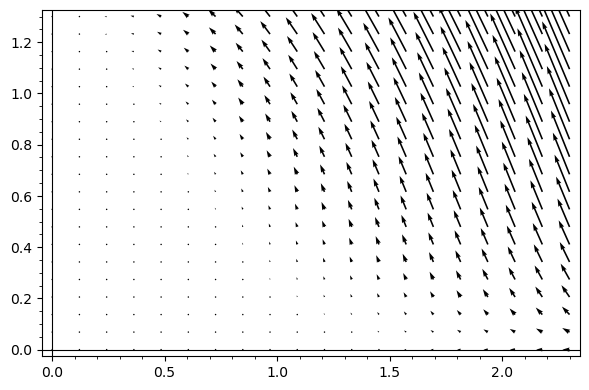

In [125]:
plot=plot_vector_field((eq1,eq2), (x,qx,qx+2.3), (y,qy,qy+1.3));plot

Equacions en funció de t

In [126]:
var("t");
x1=function("x1")(t);
y1=function("y1")(t);
eqd1=diff(x1(t),t)==eq1.subs(x=x1(t),y=y1(t));
eqd2=diff(y1(t),t)==eq2.subs(x=x1(t),y=y1(t));
show(eqd1)
show(eqd2)

diff(x1(t), t) == -1/4*(4*x1(t)*y1(t) + 16*y1(t)^2 + 5*x1(t) - 5*y1(t) - 5)*x1(t)

diff(y1(t), t) == 1/40*(264*x1(t)^2 + 56*x1(t)*y1(t) - 40*y1(t)^2 - 95*x1(t) + 95*y1(t) - 70)*y1(t)

Estudi de cada punt singular a partir del calcul dels vaps de la matriu diferencial o jacobià a cada punt d'equilibri trobat

Càlcul del Jacobià

In [127]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]);A
show(A)

[                        -1/4*x*(4*y + 5) - x*y - 4*y^2 - 5/4*x + 5/4*y + 5/4                                                      -1/4*(4*x + 32*y - 5)*x]
[                                                  1/40*(528*x + 56*y - 95)*y 33/5*x^2 + 1/40*(56*x - 80*y + 95)*y + 7/5*x*y - y^2 - 19/8*x + 19/8*y - 7/4]

In [128]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[ 5/4    0]
[   0 -7/4]

Tenim una matriu diagonal de manera que els vaps d'aquesta matriu són 5/4 i -7/4.
Aquí podem veure de manera ràpida que els veps seran (1,0) repulsor pel vap 5/4 i (0,1) atractor pel vap -7/4.

In [129]:
A.eigenvalues()

[-7/4, 5/4]

Tenim dos vaps de signe contrari, per tant tenim una sella

In [130]:
px=px1;py=py1;
vec=A.eigenvectors_right();vec

[(-7/4, [(0, 1)], 1), (5/4, [(1, 0)], 1)]

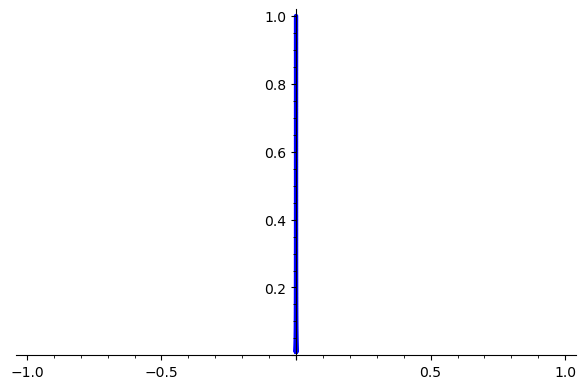

In [131]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració
kt=4;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[0][0]<0):
    sep1=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep1=list_plot(sol1,color="red")
sep1

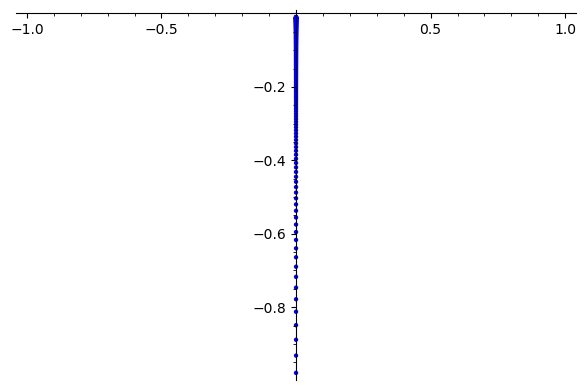

In [132]:
kt=2.1;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[0][0]<0):
    sep2=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep2=lis
if(vec[0][0]<0):
    sep2=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep2=list_plot(sol1,color="red")
sep2


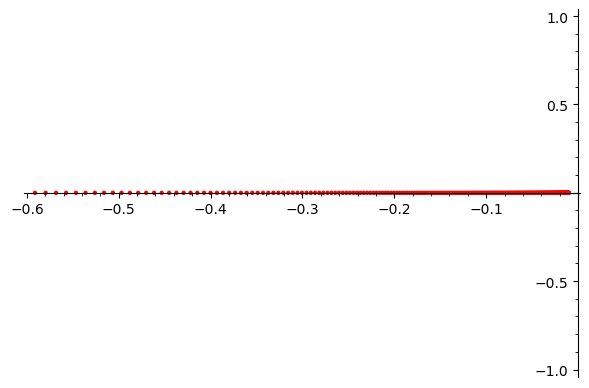

In [133]:
kt=2.9;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
    
sol1=[[j,k] for i,j,k in sol]

if(vec[1][0]<0):
    sep3=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep3=list_plot(sol1,color="red")
sep3

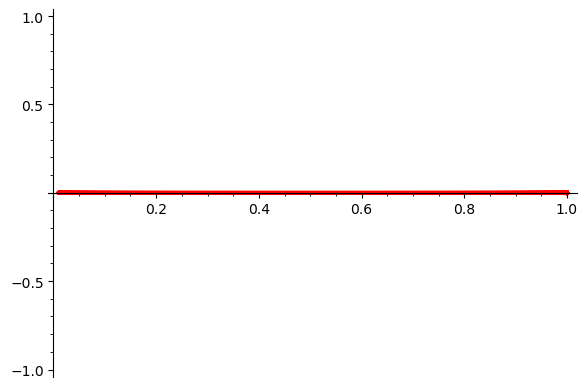

In [134]:
kt=20;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[1][0]<0):
    sep4=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep4=list_plot(sol1,color="red")
sep4

Ens hem de quedar amb el primer quadrant

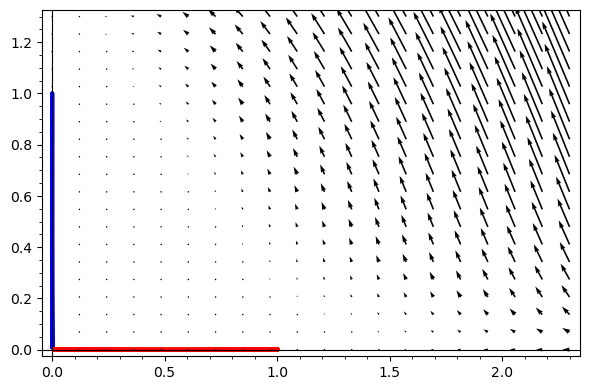

In [135]:
punt1=sep1+sep4+plot
punt1

Confirmem els resultats que hem observat amb la matriu jacobiana al punt estudiat

Jacobià en el segón punt

In [136]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px2,y=py2);A

[ -5/4   1/4]
[    0 99/40]

Tenim una matriu triangular inferior de manera que els veps són els valors de la diagonal

In [137]:
A.eigenvalues()

[99/40, -5/4]

In [138]:
px=px2;py=py2;
vec=A.eigenvectors_right();vec

[(99/40, [(1, 149/10)], 1), (-5/4, [(1, 0)], 1)]

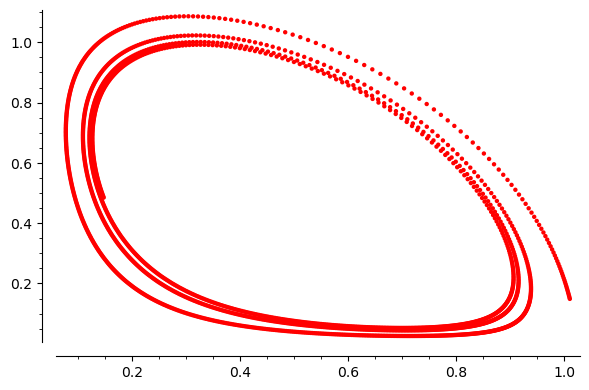

In [139]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració
kt=20;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")
show(sep5)

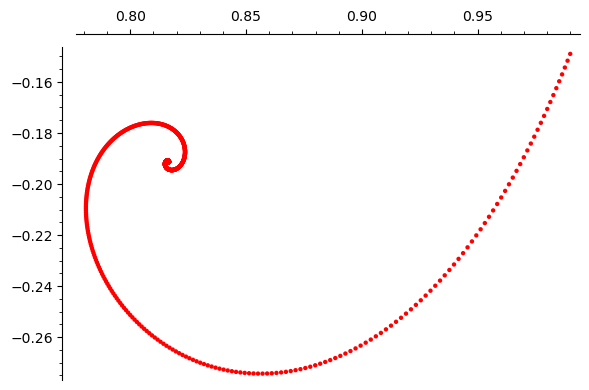

In [140]:
kt=8.7;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")
sep6

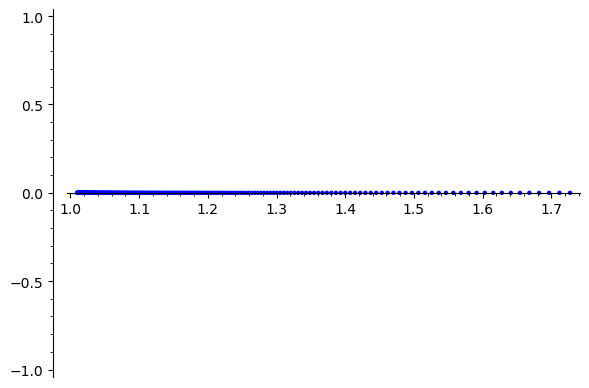

In [141]:
kt=3;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")
sep7

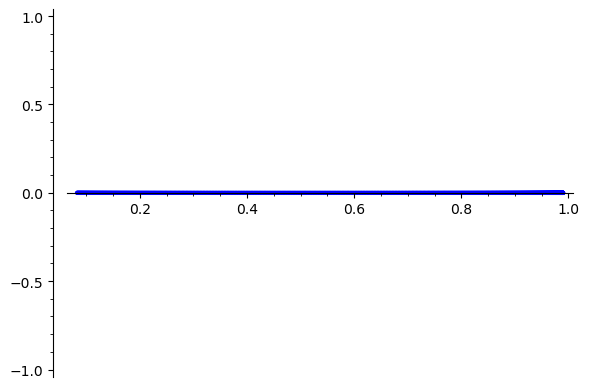

In [142]:
kt=5.6;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")
sep8

Ens quedem només amb el primer quadrant



Analitzem el seguent punt

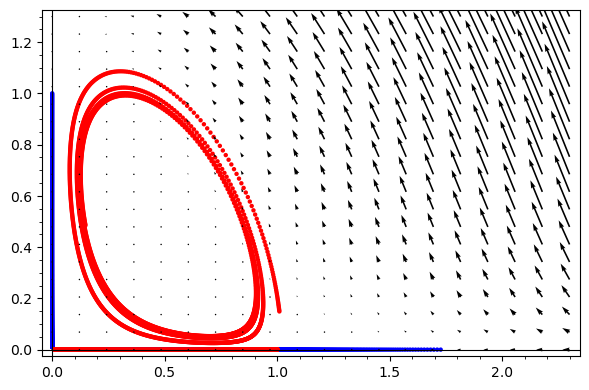

In [143]:
plot2=sep5+sep8+sep7+punt1
plot2

In [144]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px7,y=py7);A

[  -7/8  -13/8]
[197/80  83/80]

In [145]:
A.eigenvalues()
show(A.eigenvalues()[0].n())
show(A.eigenvalues()[1].n())

0.0812500000000000 - 1.75702829729632*I

0.0812500000000000 + 1.75702829729632*I

In [146]:
px=px7;py=py7;
vec1=A.eigenvectors_right();vec1

[(-1/160*I*sqrt(79031) + 13/160, [(1, 1/260*I*sqrt(79031) - 153/260)], 1),
 (1/160*I*sqrt(79031) + 13/160, [(1, -1/260*I*sqrt(79031) - 153/260)], 1)]

Tenim vaps complexes amb part real positiva de manera que ens trobarem amb un node o amb un centre.

Com ja hem estudiat tots els punts podem saber com es comporta qualsevol punt al primer quadrant.

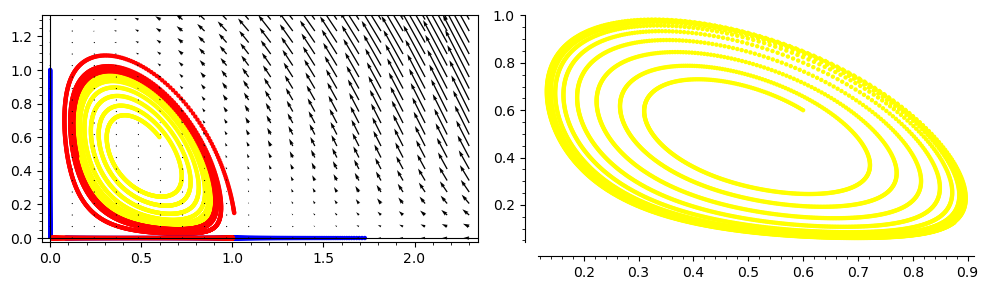

In [147]:
px=0.6;py=0.6;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb1=list_plot(sol1,color="yellow")
plott=orb1+plot2
graphics_array([plott,orb1]).show(figsize=(10,3))

Estudi del model presa-depredador.

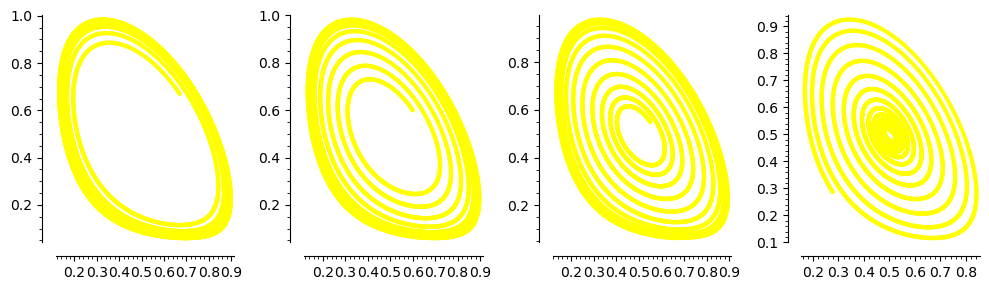

In [148]:
px=0.67;py=0.67;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb4=list_plot(sol1,color="yellow")


px=0.6;py=0.6;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb1=list_plot(sol1,color="yellow")

px=0.55;py=0.55;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb2=list_plot(sol1,color="yellow")

px=0.51;py=0.51;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb3=list_plot(sol1,color="yellow")
graphics_array([orb4,orb1,orb2,orb3]).show(figsize=(10,3))

Si ens situem en algun punt dintre del node repulsor que sigui diferent del 0.5,0.5, el model presa depredador es comporta de manera que hi ha coexistència entre les preses i els depredadors fent un bucle (el bucle es veu millor representat a la primera imatge, a la que ens situem més lluny del punt 0.5 0.5.

També podem observar els eixos que quan no hi ha depredadors, les preses tendiran a un equilibri estable sobre l'eix.

Per altra banda, si representem la òrbita en el punt 1/2, 1/2 podem veure que no es fa aquest bucle, sinó que es queda en aquest punt.

Augmentem el tamany del plot per veure que per a nivells alts de preses i de depredadors succeix el mateix

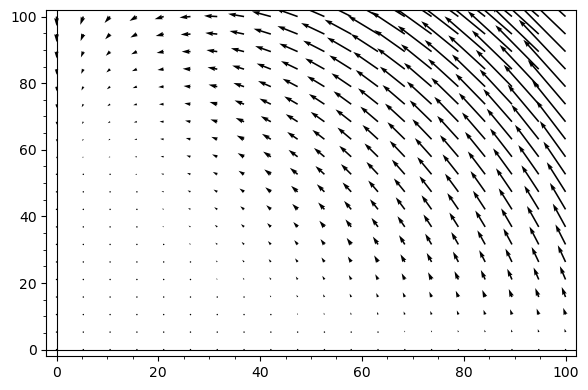

In [152]:
plot=plot_vector_field((eq1,eq2), (x,qx,qx+100), (y,qy,qy+100));plot

Representem la orbita en el punt singular 1/2,1/2

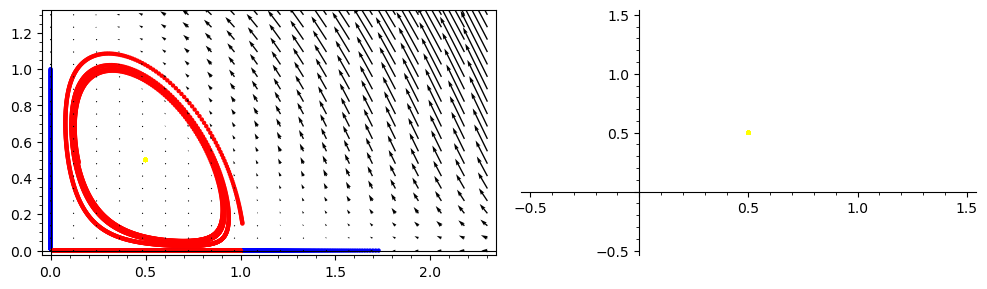

In [150]:
px=0.5;py=0.5;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb1=list_plot(sol1,color="yellow")
plott=orb1+plot2
graphics_array([plott,orb1]).show(figsize=(10,3))

Com podem veure, es representa un punt on no hi existeix aquest bucle en que es van equilibrant les orbiyes

Mirant com es comporta el model fora del focus repulsor, podem veure que també hi ha equilibri, i acaba fent el mateix bucle que ens casos en que ens situavem dintre del focus repulsor.
De manera que per concluïr aquest model presa depredador, podem dir que en qualsevol punt del model presa depredador coexistiran entre ells en el bucle representats en els dos casos

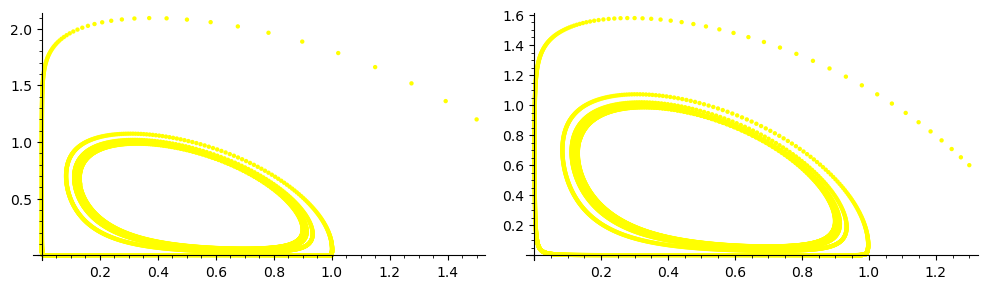

In [153]:
px=1.5;py=1.2;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb1=list_plot(sol1,color="yellow")

px=1.3;py=0.6;
kt=48.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
orb2=list_plot(sol1,color="yellow")

graphics_array([orb1,orb2]).show(figsize=(10,3))
